Câu 1: Dự đoán doanh số sản phẩm bán ra cho năm tiếp theo

1. Ở đây nhóm thấy cột line total sale doanh thu của 1 sản phẩm trong 1 năm.


Vì code khá dài nên em xin chuyển qua file colab khác: https://colab.research.google.com/drive/1d2BmxxF4POUptpEnkyCGFNFkrCQAwH0n?usp=sharing

Câu 4: Dự đoán lương của nhân viên theo các trường nghề nghiệp, tình trạng hôn nhân, cấp độ trong công ty, giới tính, tiền lương, Số năm làm việc, rate lương



In [ ]:
#Cau4:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('Cau4.csv')
df = df.iloc[:, 1:]
df.head()

,BusinessEntityID,JobTitle,MaritalStatus,OrganizationLevel,Gender,TienLuong,SoNamLamViec,Rate
0,1,Chief Executive Officer,S,NaN,M,28112.0000,13,125.5000
1,2,Vice President of Engineering,S,1.0,F,14215.3760,14,63.4615
2,3,Engineering Manager,M,2.0,M,9692.3008,15,43.2692
3,4,Senior Tool Designer,S,3.0,M,6685.5488,12,8.6200
4,4,Senior Tool Designer,S,3.0,M,6685.5488,12,8.6200


In [ ]:
#Explore data
df.describe(include='all')

,BusinessEntityID,JobTitle,MaritalStatus,OrganizationLevel,Gender,TienLuong,SoNamLamViec,Rate
count,334.000000,334,334,333.000000,334,334.000000,334.000000,334.000000
unique,NaN,67,2,NaN,2,NaN,NaN,NaN
top,NaN,Production Technician - WC30,S,NaN,M,NaN,NaN,NaN
freq,NaN,41,168,NaN,237,NaN,NaN,NaN
mean,147.793413,NaN,NaN,3.441441,NaN,4383.862975,12.784431,18.187941
std,84.625739,NaN,NaN,0.836134,NaN,2878.961818,1.196189,12.495811
min,1.000000,NaN,NaN,1.000000,NaN,2128.000000,9.000000,6.500000
25%,74.250000,NaN,NaN,3.000000,NaN,2640.000000,12.000000,11.000000
50%,157.500000,NaN,NaN,4.000000,NaN,3360.000000,13.000000,14.000000
75%,224.000000,NaN,NaN,4.000000,NaN,5465.381600,13.000000,23.076900


 #cột OrganizationLevel

---


 Độ lệch chuẩn chỉ bằng 0.836 chứng tỏ mức độ trong tổ chức quanh (3.44).
 Min (1) cách Max (4) rất gần. Vậy range của dữ liệu rất ngắn [1; 4]
 #Cột tiền lương

---
 Độ lệch chuẩn bằng 2878.96 (lớn) có nghĩa là có số tiền lương theo các nhân viên thay đổi nhiều
 Min (2128) cách Max (28112) xa. Vậy range của dữ liệu rất rộng [2128; 28112]
 #Cột số năm làm việc

---
 Độ lệch chuẩn thấp 1.196 chứng tỏ số năm làm việc chênh lệch không nhiều quanh (12 năm). 
 Min (9) cách Max (16) gần. Vậy range của dữ liệu ngắn [9; 16]
 #Cột rate

---
 Độ lệch chuẩn bằng 12.496 chứng tỏ mức lương nhân viên trong công ty thay đổi nhiều.
 Min (6.5) cách Max (125.5). Vậy range của dữ liệu đoạn [6.5; 125.5]





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BusinessEntityID   334 non-null    int64  
 1   JobTitle           334 non-null    object 
 2   MaritalStatus      334 non-null    object 
 3   OrganizationLevel  333 non-null    float64
 4   Gender             334 non-null    object 
 5   TienLuong          334 non-null    float64
 6   SoNamLamViec       334 non-null    int64  
 7   Rate               334 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 21.0+ KB


 Có 3 kiểu dữ liệu float, 2 kiểu int, 3 kiểu object, và dữ liệu có 334 entries, riêng OrganizationLevel có 1 dòng null

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


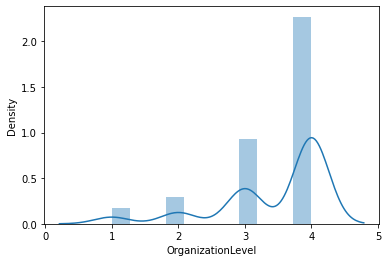

In [ ]:
#histogram
sns.distplot(df['OrganizationLevel']);

Dữ liệu biểu đồ phân phối lệch phải. Chệch khỏi phân phối chuẩn.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


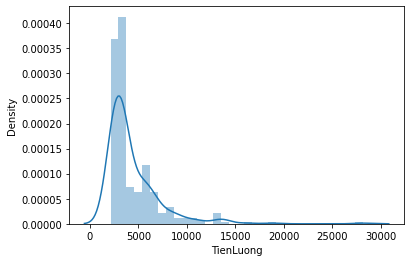

In [ ]:
sns.distplot(df['TienLuong']);

Dữ liệu biểu đồ phân phối lệch trái. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


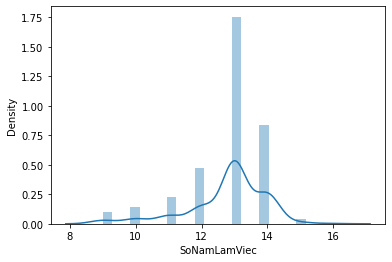

In [ ]:
sns.distplot(df['SoNamLamViec']);

Dữ liệu biểu đồ phân phối lệch phải.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


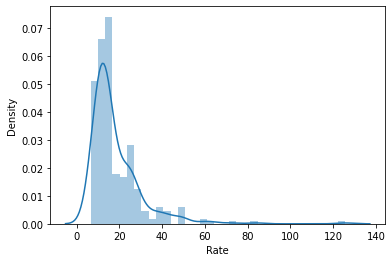

In [ ]:
sns.distplot(df['Rate']);

Dữ liệu biểu đồ phân phối lệch trái. 

In [ ]:
#clean data
df.isnull().sum()

BusinessEntityID     0
JobTitle             0
MaritalStatus        0
OrganizationLevel    1
Gender               0
TienLuong            0
SoNamLamViec         0
Rate                 0
dtype: int64

Hầu hết không có dữ liệu null. Chỉ có cột OrganizationLevel chứa 1 dòng null.

In [ ]:
df=df.fillna(0)

In [ ]:
col={'OrganizationLevel':int}
df=df.astype(col)
df.head()

,BusinessEntityID,JobTitle,MaritalStatus,OrganizationLevel,Gender,TienLuong,SoNamLamViec,Rate
0,1,Chief Executive Officer,S,0,M,28112.0000,13,125.5000
1,2,Vice President of Engineering,S,1,F,14215.3760,14,63.4615
2,3,Engineering Manager,M,2,M,9692.3008,15,43.2692
3,4,Senior Tool Designer,S,3,M,6685.5488,12,8.6200
4,4,Senior Tool Designer,S,3,M,6685.5488,12,8.6200


In [ ]:
df.duplicated().sum()

18

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

0

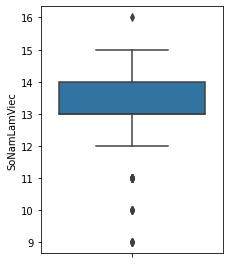

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='SoNamLamViec',data=df)

Vì các giá trị outlier ít và vẫn hợp lý nên không loại bỏ outlier

Vì cột BusinessEntityID không ảnh hưởng đến việc dự đoán tiền lương nhân viên

In [ ]:
df=df.drop(columns=["BusinessEntityID"])

In [ ]:
#doi qua dang cac du lieu dang string qua dang int
df = pd.get_dummies(df,drop_first=True)
df.head()


,OrganizationLevel,TienLuong,SoNamLamViec,Rate,JobTitle_Accounts Manager,JobTitle_Accounts Payable Specialist,JobTitle_Accounts Receivable Specialist,JobTitle_Application Specialist,JobTitle_Assistant to the Chief Financial Officer,JobTitle_Benefits Specialist,JobTitle_Buyer,JobTitle_Chief Executive Officer,JobTitle_Chief Financial Officer,JobTitle_Control Specialist,JobTitle_Database Administrator,JobTitle_Design Engineer,JobTitle_Document Control Assistant,JobTitle_Document Control Manager,JobTitle_Engineering Manager,JobTitle_European Sales Manager,JobTitle_Facilities Administrative Assistant,JobTitle_Facilities Manager,JobTitle_Finance Manager,JobTitle_Human Resources Administrative Assistant,JobTitle_Human Resources Manager,JobTitle_Information Services Manager,JobTitle_Janitor,JobTitle_Maintenance Supervisor,JobTitle_Marketing Assistant,JobTitle_Marketing Manager,JobTitle_Marketing Specialist,JobTitle_Master Scheduler,JobTitle_Network Administrator,JobTitle_Network Manager,JobTitle_North American Sales Manager,JobTitle_Pacific Sales Manager,JobTitle_Production Control Manager,JobTitle_Production Supervisor - WC10,JobTitle_Production Supervisor - WC20,JobTitle_Production Supervisor - WC30,JobTitle_Production Supervisor - WC40,JobTitle_Production Supervisor - WC45,JobTitle_Production Supervisor - WC50,JobTitle_Production Supervisor - WC60,JobTitle_Production Technician - WC10,JobTitle_Production Technician - WC20,JobTitle_Production Technician - WC30,JobTitle_Production Technician - WC40,JobTitle_Production Technician - WC45,JobTitle_Production Technician - WC50,JobTitle_Production Technician - WC60,JobTitle_Purchasing Assistant,JobTitle_Purchasing Manager,JobTitle_Quality Assurance Manager,JobTitle_Quality Assurance Supervisor,JobTitle_Quality Assurance Technician,JobTitle_Recruiter,JobTitle_Research and Development Engineer,JobTitle_Research and Development Manager,JobTitle_Sales Representative,JobTitle_Scheduling Assistant,JobTitle_Senior Design Engineer,JobTitle_Senior Tool Designer,JobTitle_Shipping and Receiving Clerk,JobTitle_Shipping and Receiving Supervisor,JobTitle_Stocker,JobTitle_Tool Designer,JobTitle_Vice President of Engineering,JobTitle_Vice President of Production,JobTitle_Vice President of Sales,MaritalStatus_S,Gender_M
0,0,28112.0000,13,125.5000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,1,14215.3760,14,63.4615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,9692.3008,15,43.2692,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,6685.5488,12,8.6200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
5,3,6685.5488,12,23.7200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


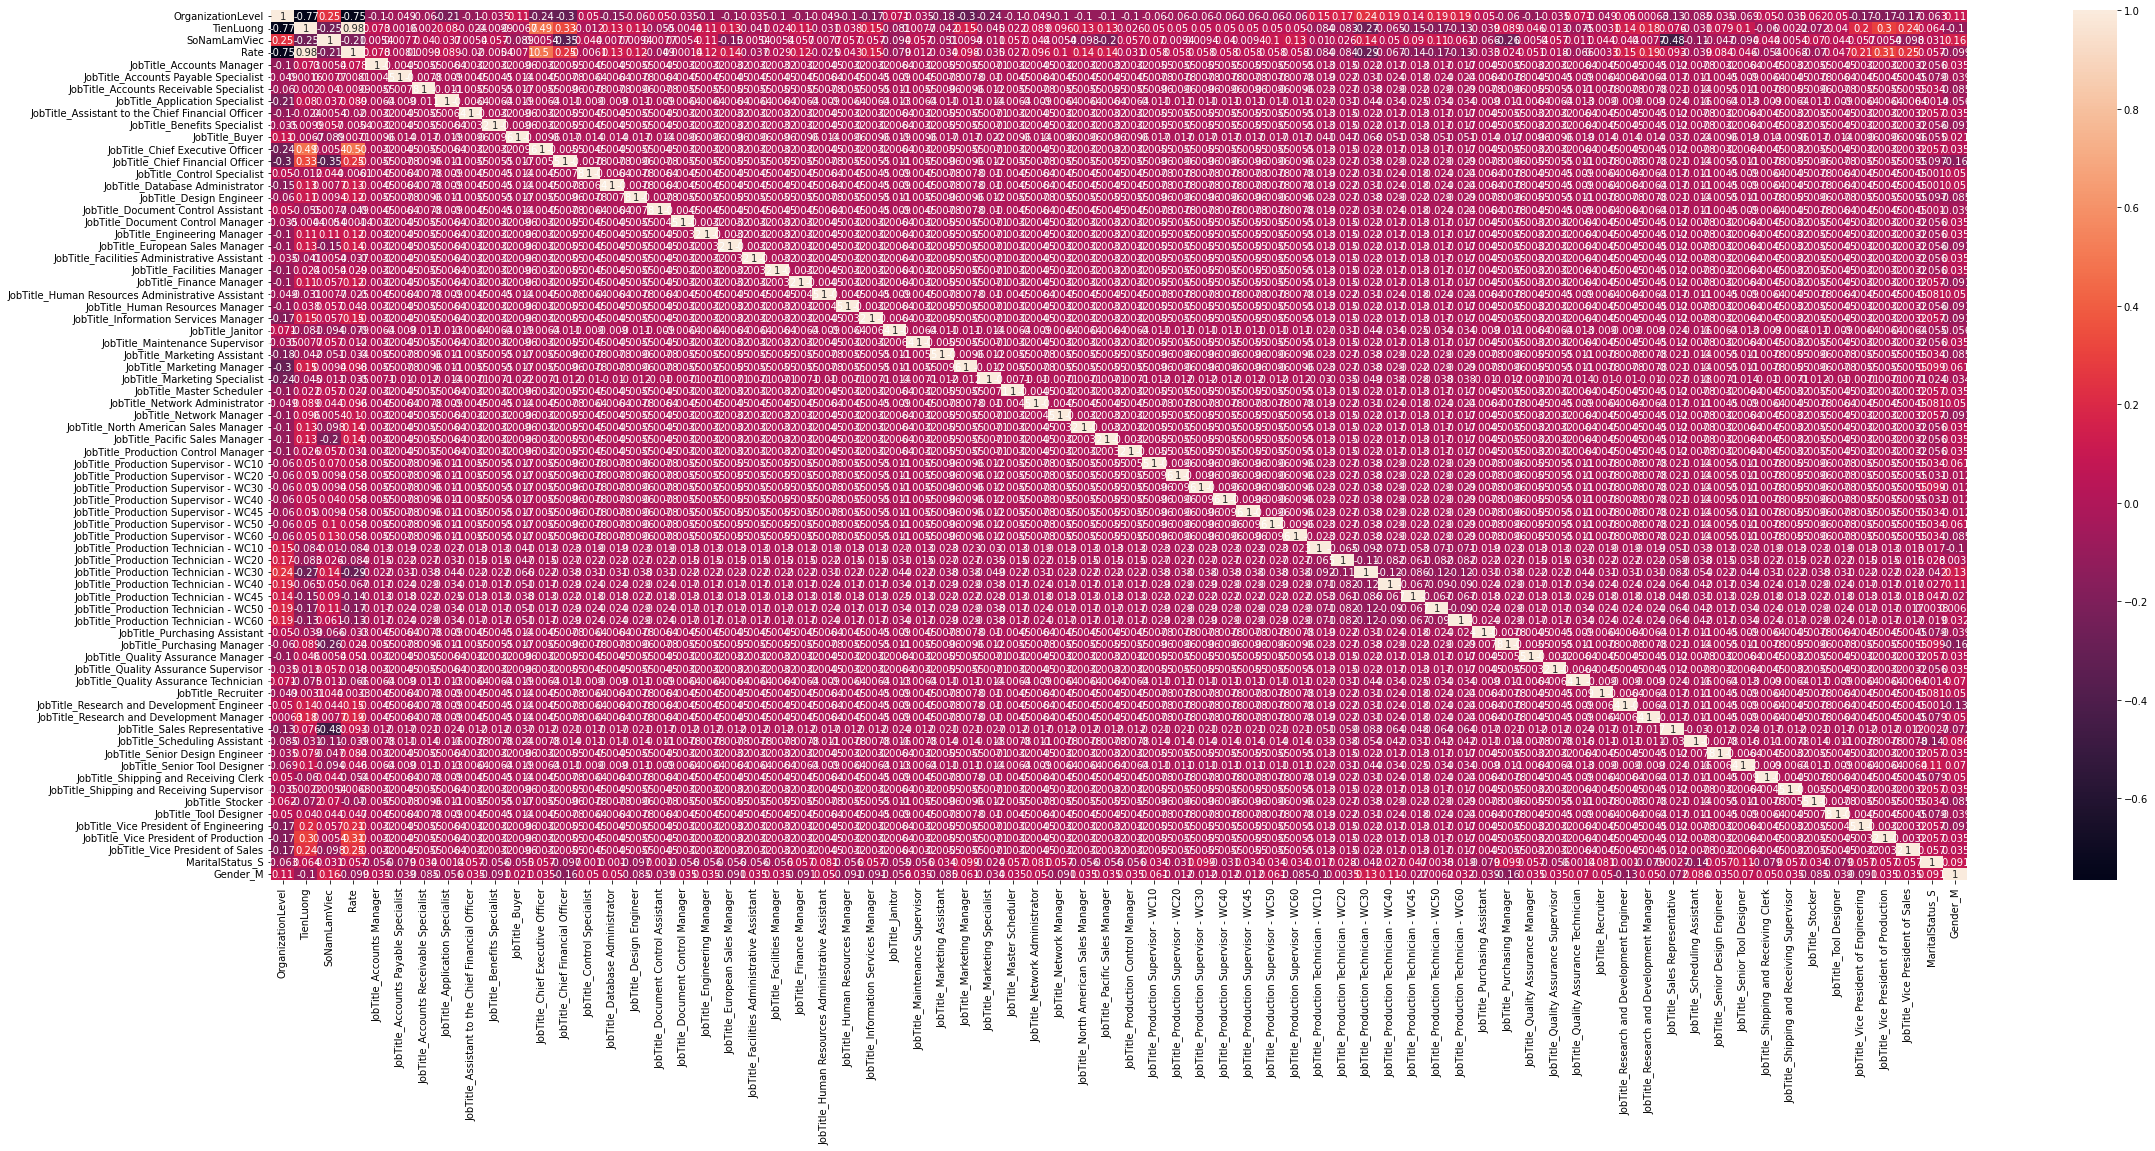

In [ ]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

Vì theo biểu đồ tương quan cột OrganizationLevel có độ tương quan thấp so với Tiền lương nên nhóm drop cột OrganizationLevel.

In [ ]:
temp=df.drop(columns=["OrganizationLevel"])

In [ ]:
x = df.drop(columns=["TienLuong"]) #independ
y = df["TienLuong"] #depend

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns
#Chia dữ liệu train & test: 80:20.
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)

In [ ]:
#Xây dựng model
model = LogisticRegression()

In [ ]:
#Tạo standard x scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

bạn sẽ gọi phương thức fit, transform với đầu vào là train_X_df để tính các giá trị từ tập huấn luyện (ví dụ, tienluong ở bước thêm và xóa cột, mean và mode ở bước xử lý giá trị thiếu, mean và độ lệch chuẩn ở bước chuẩn hóa) và đồng thời tiền xử lý train_X_df; kết quả trả về sẽ là train_X_df sau khi đã tiền xử lý, là một mảng Numpy, bạn đặt tên là train_X_scaled.

In [ ]:
#Training the model
model.fit(X_train_scaled, y_train.astype('int'))

LogisticRegression()

In [ ]:
#đánh giá mô hình trên training set và xem kết quả:
train_acc = model.score(X_train_scaled, y_train.astype('int'))
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 100.0


Độ chính xác hơn 100%, tốt, nhưng độ chính xác tập train không hữu ích, độ chính xác tập test mới thực sự thành công.

In [ ]:
#Tao y predict
lm = LogisticRegression(solver='lbfgs',random_state=0)
lm.fit(X_train, y_train.astype('int'))
y_pred = lm.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([ 3600,  3230,  3228,  2400,  4092,  5600,  2640,  5600,  5169,
        3228,  3600,  3584,  5600,  2640,  3360,  2400,  2400,  3360,
        2280,  5600,  3230,  3360,  5600,  5600,  3584,  2280,  3600,
        3015,  2640,  5600,  5600,  3230,  2280,  3228,  5600,  4092,
        2640,  9692,  2280,  5600,  5169,  5600,  3600,  2280,  3360,
        3600,  3600,  5169,  2280,  2640,  3360,  2369,  3600,  8400,
        2220, 10774,  3360,  4256,  2640,  2988,  2640,  2400,  3600,
        2280,  5600,  2988,  4092,  2988,  2640,  3228,  5169,  2988,
        2280,  2640,  2640,  3600,  3600,  2280,  5600])

In [ ]:
#đánh giá mô hình trên test set và xem kết quả:
test_acc = accuracy_score(y_test.astype('int'), y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 78.48101265822784


Mức độ tin cậy của tập train(100%) > tập Test(78.48%) khả năng overfitting thấp. 
Mức độ tin cậy dự đoán TienLuong theo các trường được xấp xỉ 78.48% cũng khá tốt.

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
test_acc = metrics.r2_score(y_test.astype('int'), y_pred)
print("The R2_score for Test Set is {}".format(test_acc*100))

The R2_score for Test Set is 91.31645704123143


Vậy mô hình hồi quy tuyến tính đang được thống kê sẽ phù hợp với dữ liệu ở mức 91.316457%

#CÂU 3: SỬ DỤNG THUẬT TOÁN GOM CỤM ĐỂ PHÂN CỤM KHÁCH HÀNG

In [ ]:
# IMPORTING PACKAGES

import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sns.set_style('whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cau3.csv to cau3.csv


In [ ]:
df1 = pd.read_csv('cau3.csv')
df1.head(None)

,BusinessEntityID,TotalPurchaseYTD,DateFirstPurchase,BrithYear,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned
0,1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2701,-24.99,00:00.0,1958.0,S,0-25000,M,2.0,0.0,Partial College,Manual,1.0,1.0
1896,2702,2375.08,00:00.0,1960.0,M,50001-75000,F,1.0,0.0,Partial College,Skilled Manual,1.0,1.0
1897,2703,76.95,00:00.0,1939.0,M,greater than 100000,F,2.0,4.0,Graduate Degree,Management,1.0,3.0
1898,2704,2307.98,00:00.0,1950.0,M,25001-50000,F,2.0,1.0,Partial High School,Skilled Manual,1.0,2.0


In [ ]:
df3 = [df1["BusinessEntityID"], df1["TotalPurchaseYTD"],df1["BrithYear"],df1["YearlyIncome"],df1["Gender"] ]
headers = ["BusinessEntityID", "TotalPurchaseYTD", "BrithYear", "YearlyIncome", "Gender"]
df = pd.concat(df3, axis=1, keys=headers)
df

,BusinessEntityID,TotalPurchaseYTD,BrithYear,YearlyIncome,Gender
0,1,0.00,NaN,NaN,NaN
1,2,0.00,NaN,NaN,NaN
2,3,0.00,NaN,NaN,NaN
3,4,0.00,NaN,NaN,NaN
4,5,0.00,NaN,NaN,NaN
...,...,...,...,...,...
1895,2701,-24.99,1958.0,0-25000,M
1896,2702,2375.08,1960.0,50001-75000,F
1897,2703,76.95,1939.0,greater than 100000,F
1898,2704,2307.98,1950.0,25001-50000,F


In [ ]:
today = pd.to_datetime('today')

In [ ]:
year_today = today.year

In [ ]:
#Tính tuổi của khách hàng
df['Age'] = year_today - df['BrithYear']
df.to_csv('salescutomer.csv')

In [ ]:
df.describe()

,BusinessEntityID,TotalPurchaseYTD,BrithYear,Age
count,1900.000000,1900.000000,412.000000,412.000000
mean,1456.754737,-2275.869914,1961.361650,60.638350
std,856.224889,5265.143640,11.286699,11.286699
min,1.000000,-48861.593900,1930.000000,42.000000
25%,660.500000,-2510.811200,1953.000000,51.000000
50%,1610.000000,0.000000,1963.000000,59.000000
75%,2230.250000,0.000000,1971.000000,69.000000
max,2705.000000,9263.661800,1980.000000,92.000000


In [ ]:
#Gán các khoảng thu nhập theo stt 0->4 để dễ tính toán
df['YearlyIncome'] = df['YearlyIncome'].map({'0-25000': 0, '25001-50000': 1,'50001-75000': 2, '75001-100000' : 3, 'greater than 100000' : 4  })


In [ ]:
df['YearlyIncome'] = pd.to_numeric(df['YearlyIncome'])

#**xét sự phân bố dữ liệu.**

**Phân phối thu nhập hàng năm:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

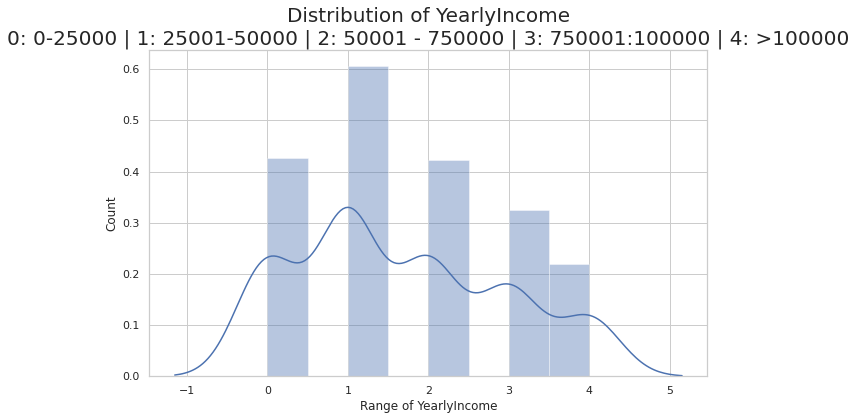

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['YearlyIncome'])
plt.title('Distribution of YearlyIncome''\n'
'0: 0-25000 | 1: 25001-50000 | 2: 50001 - 750000 | 3: 750001:100000 | 4: >100000', fontsize = 20)
plt.xlabel('Range of YearlyIncome')
plt.ylabel('Count')

Từ đồ thị trên ta thấy:
+ Thu nhập có số lượng khách hàng cao nhất: 250001 - 50000
+ Thu nhập có số lượng khách hàng thấp nhất: >100000

=> Các khách hàng có thu nhập 250001 - 50000 thì mua sắm nhiều.


**Phân bố theo độ tuổi:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Số lượng')

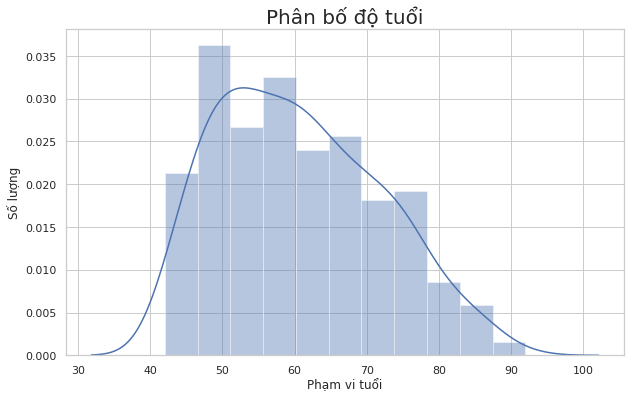

In [ ]:
# Phân bổ độ tuổi
plt.figure (figsize = (10, 6))
sns.set (style = 'whitegrid')
sns.distplot (df['Age'])
plt.title ('Phân bố độ tuổi', fontsize = 20)
plt.xlabel ('Phạm vi tuổi')
plt.ylabel ('Số lượng')

Bằng cách xem biểu đồ:
+ Có nhiều khách hàng ở nhiều lứa tuổi.
+ chúng ta có thể hiểu rằng độ tuổi có số lượng khách hàng cao nhất là khoảng  45-55 và số lượng khách hàng thấp nhất là từ 80-90.

**Phân tích giới tính:**

In [ ]:
df['Gender'] = df['Gender'].map({'F':0, 'M':1 })

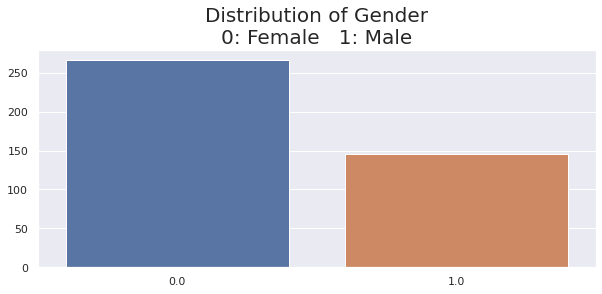

In [ ]:
genders = df.Gender.value_counts ()
sns.set_style ("darkgrid")
plt.figure (figsize = (10,4))
sns.barplot (x = genders.index, y = genders.values)
plt.title('Distribution of Gender''\n'
'0: Female   1: Male', fontsize = 20)
plt.show ()

Từ đồ thị ta thấy: só lượng khách hàng Nữ nhiều hơn khách hàng Nam

In [ ]:
# Credit card default cases

default = df[df['TotalPurchaseYTD'] > 0]
non_default = df[df['TotalPurchaseYTD'] < 0 ]

print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Default cases are {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Non-Default cases are {}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))


.......................................
Number of Default cases are 250
.......................................
Number of Non-Default cases are 796
.......................................
Percentage of Default cases is 31%
.......................................


Điều này được hiểu rằng hầu hết các khách hàng đã không bị vỡ nợ trong thẻ tín dụng của họ. Nói chính xác hơn, số lượng khách hàng đã vỡ nợ là 796 và số lượng khách hàng không vỡ nợ là 250, có nghĩa là 69% khách hàng đã vỡ nợ trên thẻ tín dụng của họ.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


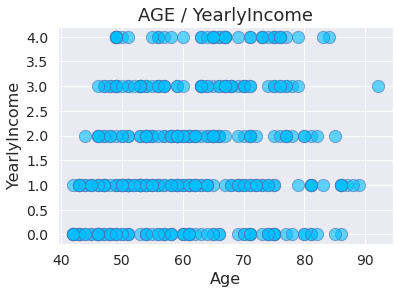

In [ ]:
# Age vs Income
sns.scatterplot('Age', 'YearlyIncome', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('AGE / YearlyIncome', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('YearlyIncome', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_income.png')
plt.show()

Như chúng ta thấy, khi tuổi càng cao thì thu nhập cũng tăng theo. Vì vậy, chúng ta có thể nói rằng các thuộc tính 'Tuổi' và 'Thu nhập' có mối quan hệ tuyến tính.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


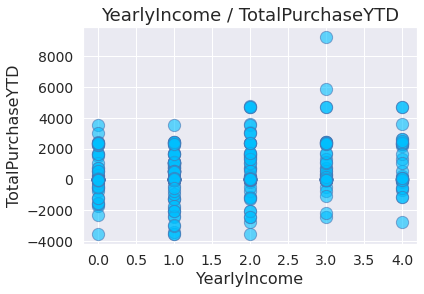

In [ ]:
#YearlyIncome vs TotalPurchaseYTD
sns.scatterplot('YearlyIncome', 'TotalPurchaseYTD', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('YearlyIncome / TotalPurchaseYTD', 
          fontsize = 18)
plt.xlabel('YearlyIncome', 
           fontsize = 16)
plt.ylabel('TotalPurchaseYTD', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('YearlyIncome vs TotalPurchaseYTD.png')
plt.show()

Như chúng ta thấy, Thu nhập càng thấp thì vỡ nợ tín dụng càng tăng khi mua sắm. 
Vì vậy, chúng ta có thể nói rằng các thuộc tính 'Thu nhập ' và 'TotalPurchaseYDT' có mối quan hệ tuyến tính.

#**Tiền xử lý dữ liệu**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BusinessEntityID  1900 non-null   int64  
 1   TotalPurchaseYTD  1900 non-null   float64
 2   BrithYear         412 non-null    float64
 3   YearlyIncome      412 non-null    float64
 4   Gender            412 non-null    float64
 5   Age               412 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 89.2 KB


In [ ]:
df

,BusinessEntityID,TotalPurchaseYTD,BrithYear,YearlyIncome,Gender,Age
0,1,0.00,NaN,NaN,NaN,NaN
1,2,0.00,NaN,NaN,NaN,NaN
2,3,0.00,NaN,NaN,NaN,NaN
3,4,0.00,NaN,NaN,NaN,NaN
4,5,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1895,2701,-24.99,1958.0,0.0,1.0,64.0
1896,2702,2375.08,1960.0,2.0,0.0,62.0
1897,2703,76.95,1939.0,4.0,0.0,83.0
1898,2704,2307.98,1950.0,1.0,0.0,72.0


In [ ]:
#Thống kê các cột có giá trị null
df.isnull().sum().sort_values(ascending=False)
for column in df.columns:
  percent=df[column].isnull().mean()
  print(f'{column}:{round(percent*100,3)}')

BusinessEntityID:0.0
TotalPurchaseYTD:0.0
BrithYear:78.316
YearlyIncome:78.316
Gender:78.316
Age:78.316


In [ ]:
df['Age'].fillna(value = df['Age'].mean(),inplace=True)
df['YearlyIncome'].fillna(value = df['YearlyIncome'].mean(),inplace=True)
df['Gender'].fillna(value = df['Gender'].median(),inplace=True)
df['BrithYear'].fillna(value = df['BrithYear'].mean(),inplace=True)

In [ ]:
df

,BusinessEntityID,TotalPurchaseYTD,BrithYear,YearlyIncome,Gender,Age
0,1,0.00,1961.36165,1.650485,0.0,60.63835
1,2,0.00,1961.36165,1.650485,0.0,60.63835
2,3,0.00,1961.36165,1.650485,0.0,60.63835
3,4,0.00,1961.36165,1.650485,0.0,60.63835
4,5,0.00,1961.36165,1.650485,0.0,60.63835
...,...,...,...,...,...,...
1895,2701,-24.99,1958.00000,0.000000,1.0,64.00000
1896,2702,2375.08,1960.00000,2.000000,0.0,62.00000
1897,2703,76.95,1939.00000,4.000000,0.0,83.00000
1898,2704,2307.98,1950.00000,1.000000,0.0,72.00000


#**Gom Cụm**

Bây giờ chúng ta tính Tổng trong Cụm của Lỗi Bình phương (WSS) cho các giá trị khác nhau của k. Tiếp theo, chúng ta chọn k mà WSS bắt đầu giảm dần. Giá trị này của K cho chúng ta số lượng cụm tốt nhất để tạo từ dữ liệu thô
Ta sẽ tính số lượng cụm tối ưu bằng cách sử dụng phương pháp khuỷu tay:

In [ ]:
X=df[["YearlyIncome","TotalPurchaseYTD"]]

In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

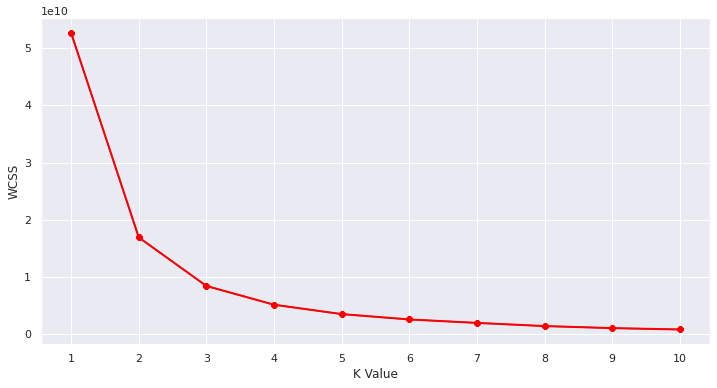

In [ ]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Đây được gọi là đồ thị khuỷu tay, trục x là số lượng cụm, số lượng cụm được lấy tại điểm khớp khuỷu tay. Đây là điểm mà việc tạo các cụm có liên quan nhất vì ở đây giá trị của WCSS đột ngột ngừng giảm. Ở đây trong biểu đồ, sau 4 lần giảm là nhỏ nhất, vì vậy chúng tôi lấy 4 là số cụm.

In [ ]:
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df["label"] = y
#The new dataframe with the clustering done
df.head()

,BusinessEntityID,TotalPurchaseYTD,BrithYear,YearlyIncome,Gender,Age,label
0,1,0.0,1961.36165,1.650485,0.0,60.63835,0
1,2,0.0,1961.36165,1.650485,0.0,60.63835,0
2,3,0.0,1961.36165,1.650485,0.0,60.63835,0
3,4,0.0,1961.36165,1.650485,0.0,60.63835,0
4,5,0.0,1961.36165,1.650485,0.0,60.63835,0


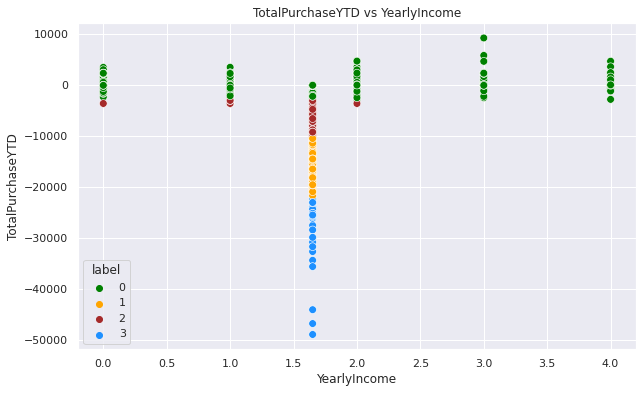

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'YearlyIncome',y = 'TotalPurchaseYTD',hue="label",  
                 palette=['green','orange','brown','dodgerblue'], legend='full',data = df  ,s = 60 )
plt.xlabel('YearlyIncome')
plt.ylabel('TotalPurchaseYTD') 
plt.title('TotalPurchaseYTD vs YearlyIncome')
plt.show()

Chúng ta có thể thấy rõ rằng 4 cụm khác nhau đã được hình thành từ dữ liệu. 
+ Cụm red là những khách hàng có thu nhập 28000 - 50000 và nợ tín dụng từ 20000-50000
+ cụm green là những khách hàng có điểm thu nhập 28000-50000 và nợ tín dụng từ 10000-25000 
+ Cụm blue là những khách hàng có thu nhập 0-50000 và nợ tín dụng từ 5000-10000
+ Cụm màu vàng là những khách hàng có thu nhập 25000 - hơn 100000 và họ không nợ tín dụng


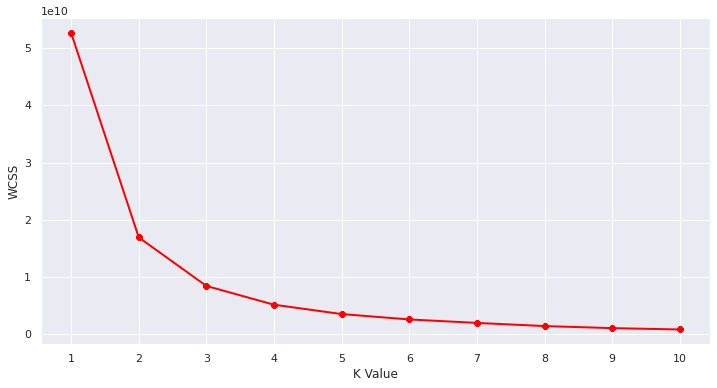

In [ ]:
X2=df[["Age","YearlyIncome","TotalPurchaseYTD"]]

#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Đây được gọi là đồ thị khuỷu tay, trục x là số lượng cụm, số lượng cụm được lấy tại điểm khớp khuỷu tay. Đây là điểm mà việc tạo các cụm có liên quan nhất vì ở đây giá trị của WCSS đột ngột ngừng giảm. Ở đây trong biểu đồ, sau 5 lần giảm là nhỏ nhất, vì vậy chúng tôi lấy 5 là số cụm.

In [ ]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df["label"] = y2
#The data with labels
df.head()

,BusinessEntityID,TotalPurchaseYTD,BrithYear,YearlyIncome,Gender,Age,label
0,1,0.0,1961.36165,1.650485,0.0,60.63835,0
1,2,0.0,1961.36165,1.650485,0.0,60.63835,0
2,3,0.0,1961.36165,1.650485,0.0,60.63835,0
3,4,0.0,1961.36165,1.650485,0.0,60.63835,0
4,5,0.0,1961.36165,1.650485,0.0,60.63835,0


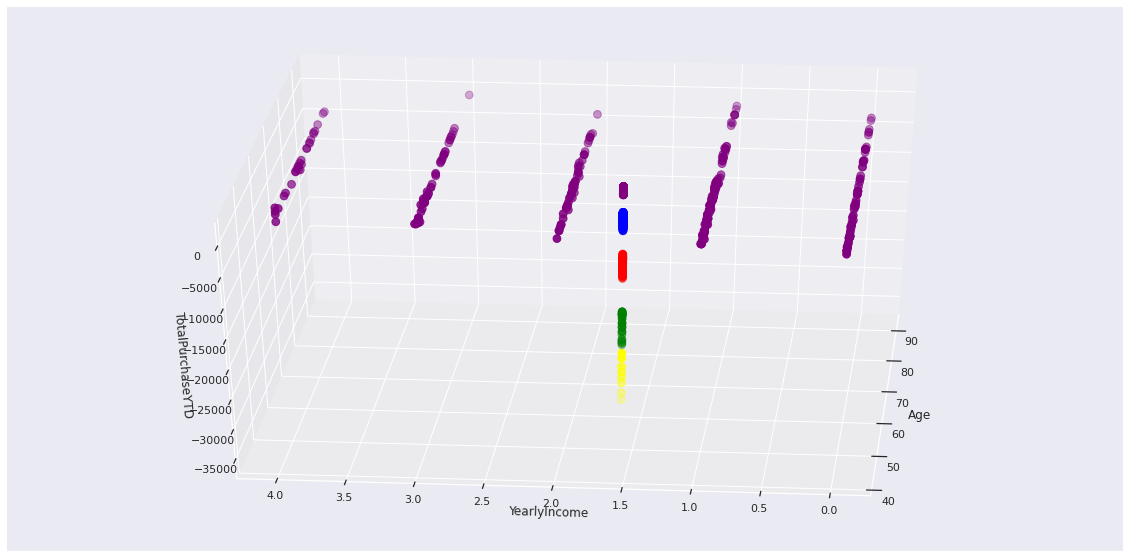

In [ ]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["YearlyIncome"][df.label == 0], df["TotalPurchaseYTD"][df.label == 0], c='purple', s=60)
ax.scatter(df.Age[df.label == 1], df["YearlyIncome"][df.label == 1], df["TotalPurchaseYTD"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["YearlyIncome"][df.label == 2], df["TotalPurchaseYTD"][df.label == 2], c='blue', s=60)
ax.scatter(df.Age[df.label == 3], df["YearlyIncome"][df.label == 3], df["TotalPurchaseYTD"][df.label == 3], c='yellow', s=60)
ax.scatter(df.Age[df.label == 4], df["YearlyIncome"][df.label == 4], df["TotalPurchaseYTD"][df.label == 4], c='green', s=60)

ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("YearlyIncome")
ax.set_zlabel('TotalPurchaseYTD')
plt.show()

+ Cụm purple: thu nhập cao , chi tiêu mua sắm ít và tuổi già
+ Cụm yellow: thu nhập trung bình, chi tiêu mua sắm trung bình và tuổi già, không nợ thẻ tín dụng
+ Cụm green: thu nhập trung bình, nợ thẻ tín dụng trung bình  và tuổi trung niên
+ Cụm blue: thu nhập trung bình,  nợ thẻ tín dụng cao và tuổi trẻ 
+ Cụm red: thu nhập trung bình, nợ thẻ tín dụng trung bình và tuổi già.

**ID của khách hàng của từng cụm:**

In [ ]:
cust1=df[df["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["BusinessEntityID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["BusinessEntityID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["BusinessEntityID"].values)
cust4=df[df["label"]==3]
print('Number of customer in 4rd group=', len(cust4))
print('They are -', cust4["BusinessEntityID"].values)
cust5=df[df["label"]==4]
print('Number of customer in 5rd group=', len(cust5))
print('They are -', cust5["BusinessEntityID"].values)


Number of customer in 1st group= 60
They are - [ 291  301  311  355  391  441  465  477  543  553  609  621  623  625
  685  737  745  753  811  817  819  823  845  851  879  881  925  931
  947  953  957  963  979  997 1001 1009 1015 1021 1035 1065 1085 1107
 1187 1209 1213 1219 1239 1289 1397 1413 1425 1443 1455 1797 1829 1839
 1859 1863 1873 1943]
--------------------------------------------
Number of customer in 2nd group= 146
They are - [ 299  315  319  331  337  345  349  361  369  373  375  389  411  427
  449  451  453  479  487  495  503  519  521  535  537  541  551  563
  573  579  585  589  615  617  619  627  629  635  637  639  657  659
  687  695  699  701  719  731  733  739  759  761  765  771  779  787
  791  793  795  801  821  825  837  847  863  909  913  933  937  965
  973  985  993 1011 1025 1027 1037 1049 1055 1083 1089 1095 1111 1113
 1125 1129 1133 1135 1137 1155 1159 1169 1183 1191 1197 1227 1233 1271
 1273 1277 1305 1307 1317 1319 1321 1327 1353 1355 1363 1